# Tokenized Banking

This ia a simple agent-based model showing an approach to tokenizing deposits in the banking system where ALL transactions and balances are handled by smart-contracts. It assumes all participating banks and the central bank are on the same blockchain.

Bank deposits are tokenized as fungible tokens (ERC20).  The bank maintains a form of a "Vault" contract to track customer balances.  The central bank is an ERC20 contract the tracks bank balances.  Interbank transfers are simply token transfers between bank accounts in the central bank.

**side note:**  Technically, you can track the balance of all accounts through a single contract. But 
that would mean all accounts (customer and bank) are in the same place, which is probably not desirable. Therefore, each bank tracks it's customers in a contract and the banks interacts at a higher-level through the central 
bank contract. See `src/` for the contracts.

## Interbank Transfer
Bob pays Alice.  Bob's account is at `BankA`. Alice banks at `BankB`.  When a transfer is made, both accounts are updated, and the central bank moves the money between the banks. Value moves with the information.

**Invariant:** *sum(all bank balances) == sum(central bank balance)*

```mermaid
flowchart TD
    Bob --1. pay alice--> BankA
    BankA --2. debit Bob--> BankA
    BankA --3. transfer to Alice--> BankB
    BankB --credit account--> Alice
    BankA --4. transfer to BankB--> CentralBank
    CentralBank --credit-->BankB
```


## Setup

Make the required imports.  Here we're using `Simular` with an embedded EVM to execute the contracts in the notebook.

In the model:
* 3 banks in the network
* The central bank
* 10 customers randomly assigned to each bank

In [1]:
import seaborn as sns
from simular import PyEvm
from abmodel.allonchain import BankingModel
sns.set_theme()
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


Create the EVM, setup the model and make some additional calculation on the DataFrame

In [2]:
evm = PyEvm()
model = BankingModel(evm)
model.run_model()
df = model.datacollector.get_model_vars_dataframe()

# Checking our invariant at each step
df["BANK_TOTALS"] = df["B0"] + df["B1"] + df["B2"]
print(df)

100%|████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3858.20it/s]

                B0            B1            B2   CENTRALBANK   BANK_TOTALS
0         0.000000      0.000000      0.000000      0.000000      0.000000
1       191.000000   4978.000000   6644.000000  11813.000000  11813.000000
2       191.000000  17397.000000  21797.000000  39385.000000  39385.000000
3       191.000000  32168.000000  39579.940115  71938.940115  71938.940115
4       191.000000  34848.000000  58542.181909  93581.181909  93581.181909
...            ...           ...           ...           ...           ...
996    9405.282675   3943.305777  77330.849553  90679.438005  90679.438005
997   15371.308268   6586.652699  56364.714700  78322.675667  78322.675667
998   12229.193697   6586.652699  66765.714700  85581.561096  85581.561096
999   10697.365032   7583.652699  68570.593362  86851.611093  86851.611093
1000   7901.505788   9020.421496  51006.422398  67928.349682  67928.349682

[1001 rows x 5 columns]


## Bank balances over time

<Axes: >

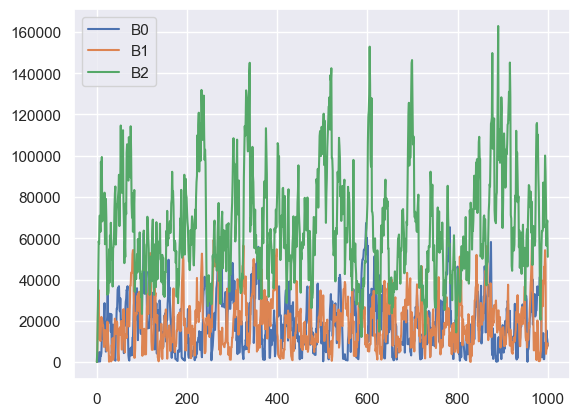

In [3]:
banks = df[["B0", "B1", "B2"]]
banks.plot()

## CentralBank balance == All bank balances

Balances across the network are in sync at every step

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

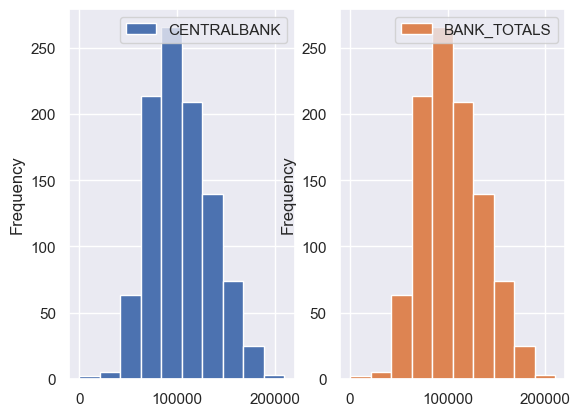

In [5]:
invariant = df[['CENTRALBANK', 'BANK_TOTALS']]
invariant.plot.hist(subplots=True, legend=True, layout=(1, 2))
#invariant.plot.hist(alpha=0.5)